# Analysing Istanbul AirBnB Data

In [3]:
import pandas as pd
import seaborn as sns

import folium
from folium import plugins
from folium.plugins import HeatMap

In [4]:

listings = pd.read_csv('./listings.csv')
listings.head()


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,20815,The Bosphorus from The Comfy Hill,78838,Gülder,NaN,Besiktas,41.06976,29.04379,Entire home/apt,973,365,41,2018-11-07,0.31,2,363
1,27271,Lovely apartment in perfect location,117026,Mutlu,NaN,Beyoglu,41.03254,28.98153,Entire home/apt,286,30,2,2018-05-04,0.03,1,303
2,27831,"Large, clean, spacious apartment",120067,Defne,NaN,Sisli,41.06777,29.00337,Entire home/apt,726,1,0,NaN,NaN,1,364
3,28277,Duplex Apartment 11 with Terrace,121607,Alen,NaN,Sisli,41.04672,28.98402,Entire home/apt,576,14,0,NaN,NaN,14,331
4,28318,Cosy home overlooking Bosphorus,121721,Aydin,NaN,Sariyer,41.09104,29.05580,Entire home/apt,1014,3,0,NaN,NaN,1,88


## Handling Missing Data

In [5]:
# Looking for no. of missing data instances in each column
listings.isna().sum(axis=0) 

id                                    0
name                                 34
host_id                               0
host_name                          1237
neighbourhood_group               24868
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       12976
reviews_per_month                 12976
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [6]:
# Looking for the relation between number_of_reviews, reviews_per_month and last_review columns
print(listings[listings.number_of_reviews == 0].shape)
listings[listings.number_of_reviews == 0]

(12976, 16)


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
2,27831,"Large, clean, spacious apartment",120067,Defne,NaN,Sisli,41.06777,29.00337,Entire home/apt,726,1,0,NaN,NaN,1,364
3,28277,Duplex Apartment 11 with Terrace,121607,Alen,NaN,Sisli,41.04672,28.98402,Entire home/apt,576,14,0,NaN,NaN,14,331
4,28318,Cosy home overlooking Bosphorus,121721,Aydin,NaN,Sariyer,41.09104,29.05580,Entire home/apt,1014,3,0,NaN,NaN,1,88
5,29241,"↪ Istanbul, Your second house",125742,Şevki,NaN,Beyoglu,41.04803,28.95227,Private room,405,3,0,NaN,NaN,1,365
8,34925,A room in galata beyoglu,150435,Esr,NaN,Beyoglu,41.02694,28.97628,Private room,563,1,0,NaN,NaN,1,364
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24863,48908267,Çekmeköy de Orman ve şehir manzaralı güzel bir ev,179170441,Niyazi,NaN,Cekmekoy,41.03943,29.18294,Private room,72,1,0,NaN,NaN,1,365
24864,48908310,Taksim Studio room on the top floor,386321015,My Home,NaN,Beyoglu,41.04024,28.98264,Private room,224,1,0,NaN,NaN,11,365
24865,48908905,Sİsli Square Lux Zero 2+1 With Elevator Cozy ...,238245787,İbrahim,NaN,Sisli,41.05924,28.98748,Entire home/apt,830,10,0,NaN,NaN,8,364
24866,48911684,★In Front of GALATA TOWER★Private Terrace★Views,375048822,NaN,NaN,Beyoglu,41.02532,28.97249,Entire home/apt,718,2,0,NaN,NaN,8,354


Since last_review and reviews_per_month columns have missing values where number_of_reviews == 0 we will fill reviews_per_month to be zero aswell  

In [7]:
listings['reviews_per_month'].fillna(0, inplace=True)

Dropping irrelavent columns

In [8]:
listings = listings.drop(['id','host_id','name', 'host_name', 'neighbourhood_group', 'last_review'], axis=1)

## Handling Categorical Data

In [9]:
listings

,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,Besiktas,41.06976,29.04379,Entire home/apt,973,365,41,0.31,2,363
1,Beyoglu,41.03254,28.98153,Entire home/apt,286,30,2,0.03,1,303
2,Sisli,41.06777,29.00337,Entire home/apt,726,1,0,0.00,1,364
3,Sisli,41.04672,28.98402,Entire home/apt,576,14,0,0.00,14,331
4,Sariyer,41.09104,29.05580,Entire home/apt,1014,3,0,0.00,1,88
...,...,...,...,...,...,...,...,...,...,...
24863,Cekmekoy,41.03943,29.18294,Private room,72,1,0,0.00,1,365
24864,Beyoglu,41.04024,28.98264,Private room,224,1,0,0.00,11,365
24865,Sisli,41.05924,28.98748,Entire home/apt,830,10,0,0.00,8,364
24866,Beyoglu,41.02532,28.97249,Entire home/apt,718,2,0,0.00,8,354


In [10]:
#Looking for cardinality of categorical variables
print('No. of neighbourhoods ' + str(listings['neighbourhood'].unique().shape[0]))
print('No. of room_types ' + str(listings['room_type'].unique().shape[0]))

No. of neighbourhoods 39
No. of room_types 4


In [11]:
#Looking for value count of each room type
listings['room_type'].value_counts()

Entire home/apt    12708
Private room       10686
Hotel room           792
Shared room          682
Name: room_type, dtype: int64

In [12]:
#Dropping less frequent room type categories
listings = listings[listings['room_type'] != 'Hotel room']
listings = listings[listings['room_type'] != 'Shared room']
listings

,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,Besiktas,41.06976,29.04379,Entire home/apt,973,365,41,0.31,2,363
1,Beyoglu,41.03254,28.98153,Entire home/apt,286,30,2,0.03,1,303
2,Sisli,41.06777,29.00337,Entire home/apt,726,1,0,0.00,1,364
3,Sisli,41.04672,28.98402,Entire home/apt,576,14,0,0.00,14,331
4,Sariyer,41.09104,29.05580,Entire home/apt,1014,3,0,0.00,1,88
...,...,...,...,...,...,...,...,...,...,...
24863,Cekmekoy,41.03943,29.18294,Private room,72,1,0,0.00,1,365
24864,Beyoglu,41.04024,28.98264,Private room,224,1,0,0.00,11,365
24865,Sisli,41.05924,28.98748,Entire home/apt,830,10,0,0.00,8,364
24866,Beyoglu,41.02532,28.97249,Entire home/apt,718,2,0,0.00,8,354


In [13]:
# Since no. of rows in data is quite larger than no. of categories we will be creating dummy variables
neighbourhood_dummies = pd.get_dummies(listings.neighbourhood)
listings_orig = listings
listings = pd.concat([listings, neighbourhood_dummies], axis=1)


listings['room_type'] = pd.factorize(listings.room_type)[0]

Dropping categorical columns

In [14]:
listings = listings.drop(['neighbourhood'], axis=1)

In [15]:
listings.shape

(23394, 48)

In [16]:
listings

,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,Adalar,...,Sariyer,Sile,Silivri,Sisli,Sultanbeyli,Sultangazi,Tuzla,Umraniye,Uskudar,Zeytinburnu
0,41.06976,29.04379,0,973,365,41,0.31,2,363,0,...,0,0,0,0,0,0,0,0,0,0
1,41.03254,28.98153,0,286,30,2,0.03,1,303,0,...,0,0,0,0,0,0,0,0,0,0
2,41.06777,29.00337,0,726,1,0,0.00,1,364,0,...,0,0,0,1,0,0,0,0,0,0
3,41.04672,28.98402,0,576,14,0,0.00,14,331,0,...,0,0,0,1,0,0,0,0,0,0
4,41.09104,29.05580,0,1014,3,0,0.00,1,88,0,...,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24863,41.03943,29.18294,1,72,1,0,0.00,1,365,0,...,0,0,0,0,0,0,0,0,0,0
24864,41.04024,28.98264,1,224,1,0,0.00,11,365,0,...,0,0,0,0,0,0,0,0,0,0
24865,41.05924,28.98748,0,830,10,0,0.00,8,364,0,...,0,0,0,1,0,0,0,0,0,0
24866,41.02532,28.97249,0,718,2,0,0.00,8,354,0,...,0,0,0,0,0,0,0,0,0,0


## Handling Outliers

In [17]:
listings.describe()

,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,Adalar,...,Sariyer,Sile,Silivri,Sisli,Sultanbeyli,Sultangazi,Tuzla,Umraniye,Uskudar,Zeytinburnu
count,23394.000000,23394.000000,23394.000000,23394.000000,23394.000000,23394.000000,23394.000000,23394.000000,23394.000000,23394.000000,...,23394.000000,23394.000000,23394.000000,23394.000000,23394.000000,23394.000000,23394.000000,23394.000000,23394.000000,23394.000000
mean,41.028877,28.980889,0.456784,578.490468,4.722322,8.003505,0.358864,7.187869,251.760964,0.007908,...,0.013209,0.007224,0.001881,0.145208,0.000812,0.000940,0.004275,0.010473,0.030093,0.004788
std,0.046204,0.128761,0.498140,3536.854072,24.919392,24.006570,0.745040,19.539106,133.954083,0.088577,...,0.114169,0.084689,0.043329,0.352318,0.028488,0.030652,0.065242,0.101801,0.170847,0.069028
min,40.813320,28.018990,0.000000,31.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,41.005460,28.972690,0.000000,163.000000,1.000000,0.000000,0.000000,1.000000,135.250000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,41.031700,28.982870,0.000000,286.000000,1.000000,0.000000,0.000000,2.000000,344.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,41.048470,29.012365,1.000000,500.000000,3.000000,4.000000,0.350000,6.000000,365.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,41.483730,29.908960,1.000000,194577.000000,1125.000000,461.000000,11.780000,195.000000,365.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Applying 95% winsorization to Price to handle outliers

In [18]:
from scipy.stats.mstats import winsorize

listings['price'] = winsorize(listings['price'], limits=[0.025, 0.025])
listings.describe()

,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,Adalar,...,Sariyer,Sile,Silivri,Sisli,Sultanbeyli,Sultangazi,Tuzla,Umraniye,Uskudar,Zeytinburnu
count,23394.000000,23394.000000,23394.000000,23394.000000,23394.000000,23394.000000,23394.000000,23394.000000,23394.000000,23394.000000,...,23394.000000,23394.000000,23394.000000,23394.000000,23394.000000,23394.000000,23394.000000,23394.000000,23394.000000,23394.000000
mean,41.028877,28.980889,0.456784,419.662392,4.722322,8.003505,0.358864,7.187869,251.760964,0.007908,...,0.013209,0.007224,0.001881,0.145208,0.000812,0.000940,0.004275,0.010473,0.030093,0.004788
std,0.046204,0.128761,0.498140,408.043070,24.919392,24.006570,0.745040,19.539106,133.954083,0.088577,...,0.114169,0.084689,0.043329,0.352318,0.028488,0.030652,0.065242,0.101801,0.170847,0.069028
min,40.813320,28.018990,0.000000,80.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,41.005460,28.972690,0.000000,163.000000,1.000000,0.000000,0.000000,1.000000,135.250000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,41.031700,28.982870,0.000000,286.000000,1.000000,0.000000,0.000000,2.000000,344.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,41.048470,29.012365,1.000000,500.000000,3.000000,4.000000,0.350000,6.000000,365.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,41.483730,29.908960,1.000000,2026.000000,1125.000000,461.000000,11.780000,195.000000,365.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [19]:
## Minimum nights cannot be less than 1 and greater than 365

listings.loc[listings.minimum_nights > 365, "minimum_nights"] = 365
listings.loc[listings.minimum_nights < 1, "minimum_nights"] = 1

## Which neighborhoods are most densely listed?

In [20]:
# Ploting lat long of each listing on a heat map to see where they are most densely listed
heat_df = listings.loc[:,["latitude","longitude"]]
map_hooray = folium.Map(location=[41.0082 ,28.9784], zoom_start=9)

heat_data = heat_df.values.tolist()
HeatMap(heat_data,radius=13).add_to(map_hooray)
map_hooray

In [21]:
df_count = pd.DataFrame(listings_orig.groupby(['neighbourhood']).count().sort_values(by=['id'], ascending=False)['id'])

df_count = df_count.rename(columns={'id': 'No. of Listings'}).reset_index()
df_count

KeyError: 'id'

## Which neighbourhoods have the highest listing prices?

In [22]:
## Getting the median price for each neighbourhood and sorting them in descending order

pd.DataFrame(listings_orig.groupby(['neighbourhood']).median().sort_values(by=['price'], ascending=False)['price']).reset_index()  

,neighbourhood,price
0,Silivri,815.0
1,Catalca,661.0
2,Gaziosmanpasa,528.0
3,Sile,521.0
4,Adalar,500.0
5,Basaksehir,487.0
6,Beykoz,477.0
7,Buyukcekmece,406.0
8,Sariyer,400.0
9,Zeytinburnu,369.0


In [23]:
listings_orig['price'].median()

286.0

## Which neighborhoods are most popular among Airbnb guests?

In [24]:
## Grouping each neighbourhood and taking a sum of reviews of each lisitng for each neighbourhood, and then sorting them in descending order

pd.DataFrame(listings_orig.groupby(['neighbourhood']).sum().sort_values(by=['number_of_reviews'], ascending=False)['number_of_reviews']).reset_index()

,neighbourhood,number_of_reviews
0,Beyoglu,100447
1,Fatih,36771
2,Sisli,13510
3,Kadikoy,11566
4,Besiktas,7553
5,Adalar,1837
6,Uskudar,1823
7,Atasehir,1657
8,Maltepe,1211
9,Esenyurt,1027


## In which neighborhoods are AirBnB accommodations most available around the year on average?

In [25]:
## Took a mean of availabilty of each neighbourhood group and sorted them in descending order
pd.DataFrame(listings_orig.groupby(['neighbourhood']).mean().sort_values(by=['availability_365'], ascending=False)['availability_365']).reset_index()

,neighbourhood,availability_365
0,Fatih,286.781640
1,Buyukcekmece,273.174757
2,Sile,269.603550
3,Gaziosmanpasa,269.152941
4,Beyoglu,267.060981
5,Arnavutkoy,261.292135
6,Esenler,256.000000
7,Sisli,254.815425
8,Atasehir,248.946950
9,Esenyurt,247.176305


### Looking for predictors (apart from dummy variables) that are most correlated with price

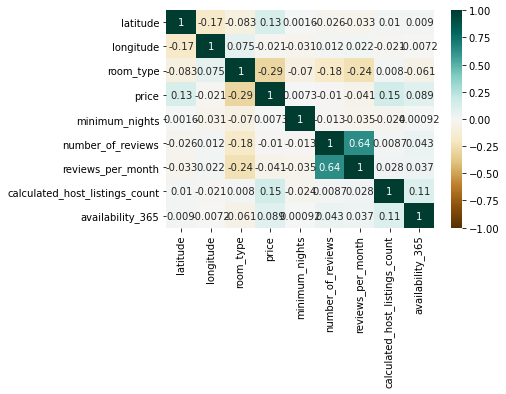

In [26]:
sns.heatmap(listings.iloc[:, range(0,9)].corr(), vmin=-1, vmax=1, annot=True, cmap='BrBG');


In [27]:
listings.iloc[:, range(0,9)]

,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,41.06976,29.04379,0,973,365,41,0.31,2,363
1,41.03254,28.98153,0,286,30,2,0.03,1,303
2,41.06777,29.00337,0,726,1,0,0.00,1,364
3,41.04672,28.98402,0,576,14,0,0.00,14,331
4,41.09104,29.05580,0,1014,3,0,0.00,1,88
...,...,...,...,...,...,...,...,...,...
24863,41.03943,29.18294,1,80,1,0,0.00,1,365
24864,41.04024,28.98264,1,224,1,0,0.00,11,365
24865,41.05924,28.98748,0,830,10,0,0.00,8,364
24866,41.02532,28.97249,0,718,2,0,0.00,8,354


## Predicting AirBnB Listing prices for Istanbul

Below I worked on finding the best prediction model. Among the models Elastic Net, Random Forest and Gradient Boosting Regression Tree (GBRT) model.

Since data had 48 predictors the purpose of using elastic net was to rule out the least important predictors. But since lat long is most impoortant predictor her and it is not linearly related with price. GBRT turned out to be a better predictor as it is more flexible.



In [28]:
listings

,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,Adalar,...,Sariyer,Sile,Silivri,Sisli,Sultanbeyli,Sultangazi,Tuzla,Umraniye,Uskudar,Zeytinburnu
0,41.06976,29.04379,0,973,365,41,0.31,2,363,0,...,0,0,0,0,0,0,0,0,0,0
1,41.03254,28.98153,0,286,30,2,0.03,1,303,0,...,0,0,0,0,0,0,0,0,0,0
2,41.06777,29.00337,0,726,1,0,0.00,1,364,0,...,0,0,0,1,0,0,0,0,0,0
3,41.04672,28.98402,0,576,14,0,0.00,14,331,0,...,0,0,0,1,0,0,0,0,0,0
4,41.09104,29.05580,0,1014,3,0,0.00,1,88,0,...,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24863,41.03943,29.18294,1,80,1,0,0.00,1,365,0,...,0,0,0,0,0,0,0,0,0,0
24864,41.04024,28.98264,1,224,1,0,0.00,11,365,0,...,0,0,0,0,0,0,0,0,0,0
24865,41.05924,28.98748,0,830,10,0,0.00,8,364,0,...,0,0,0,1,0,0,0,0,0,0
24866,41.02532,28.97249,0,718,2,0,0.00,8,354,0,...,0,0,0,0,0,0,0,0,0,0


In [29]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.linear_model import ElasticNet
from sklearn.ensemble import RandomForestRegressor

In [30]:

X_train, X_test, y_train, y_test = train_test_split(listings.loc[:, listings.columns != 'price']
 ,listings['price'], test_size=0.30, random_state=42)

#### Gradient Boosting Model

In [56]:
gbrt = GradientBoostingRegressor(max_depth = 3, n_estimators = 1000)
gbrt.fit(X_train, y_train)

errors = [mean_squared_error(y_test, y_pred) for y_pred in gbrt.staged_predict(X_test)]

bst_n_estimators = np.argmin(errors) + 1

gbrt_best = GradientBoostingRegressor(max_depth = 3, n_estimators = bst_n_estimators)
gbrt_best.fit(X_train, y_train)


GradientBoostingRegressor(n_estimators=795)

In [57]:
y_pred = gbrt.predict(X_test)
score = r2_score(y_test, y_pred)
print('R2 Score: ' + str(score))
print('MSE: ' + str(mean_squared_error(y_test, y_pred)))

R2 Score: 0.299953362938124
MSE: 116111.82577852394


In [31]:
y_test[X_test['Sisli'] == 1].median()

315.0

In [32]:
y_train[X_train['Sisli'] == 1].median()

300.0

#### Elastic Net Model

In [33]:
elastic_net = ElasticNet(alpha = 0.1, l1_ratio = 0.7)
elastic_net.fit(X_train, y_train)


ElasticNet(alpha=0.1, l1_ratio=0.7)

In [34]:
y_pred = elastic_net.predict(X_test)
score = r2_score(y_test, y_pred)
print('R2 Score: ' + str(score))
print('MSE: ' + str(mean_squared_error(y_test, y_pred)))

R2 Score: 0.15423395036282805
MSE: 140281.28271142842


#### Random Forest Model

In [ ]:
rnd_clf = RandomForestRegressor(n_estimators = 500, max_leaf_nodes = 10, n_jobs = 1)
rnd_clf.fit(X_train, y_train)
y_pred = rnd_clf.predict(X_test)

In [ ]:
y_pred = rnd_clf.predict(X_test)
score = r2_score(y_test, y_pred)
print('R2 Score: ' + str(score))
print('MSE: ' + str(mean_squared_error(y_test, y_pred)))